# Multiple linear regression

https://scikit-learn.org/stable/

### Importing needed packages


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

### Downloading Data

In [3]:
import urllib.request

# Download the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
urllib.request.urlretrieve(url, "FuelConsumption.csv")
print("Dataset downloaded successfully as 'FuelConsumption.csv'")

Dataset downloaded successfully as 'FuelConsumption.csv'


## Reading the data


In [4]:
df = pd.read_csv("FuelConsumption.csv") # Read the data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']] # Create a new DataFrame with selected columns
cdf.head(9) # first 9 rows

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Now we can plot emission values with other features to see their linear relation together.

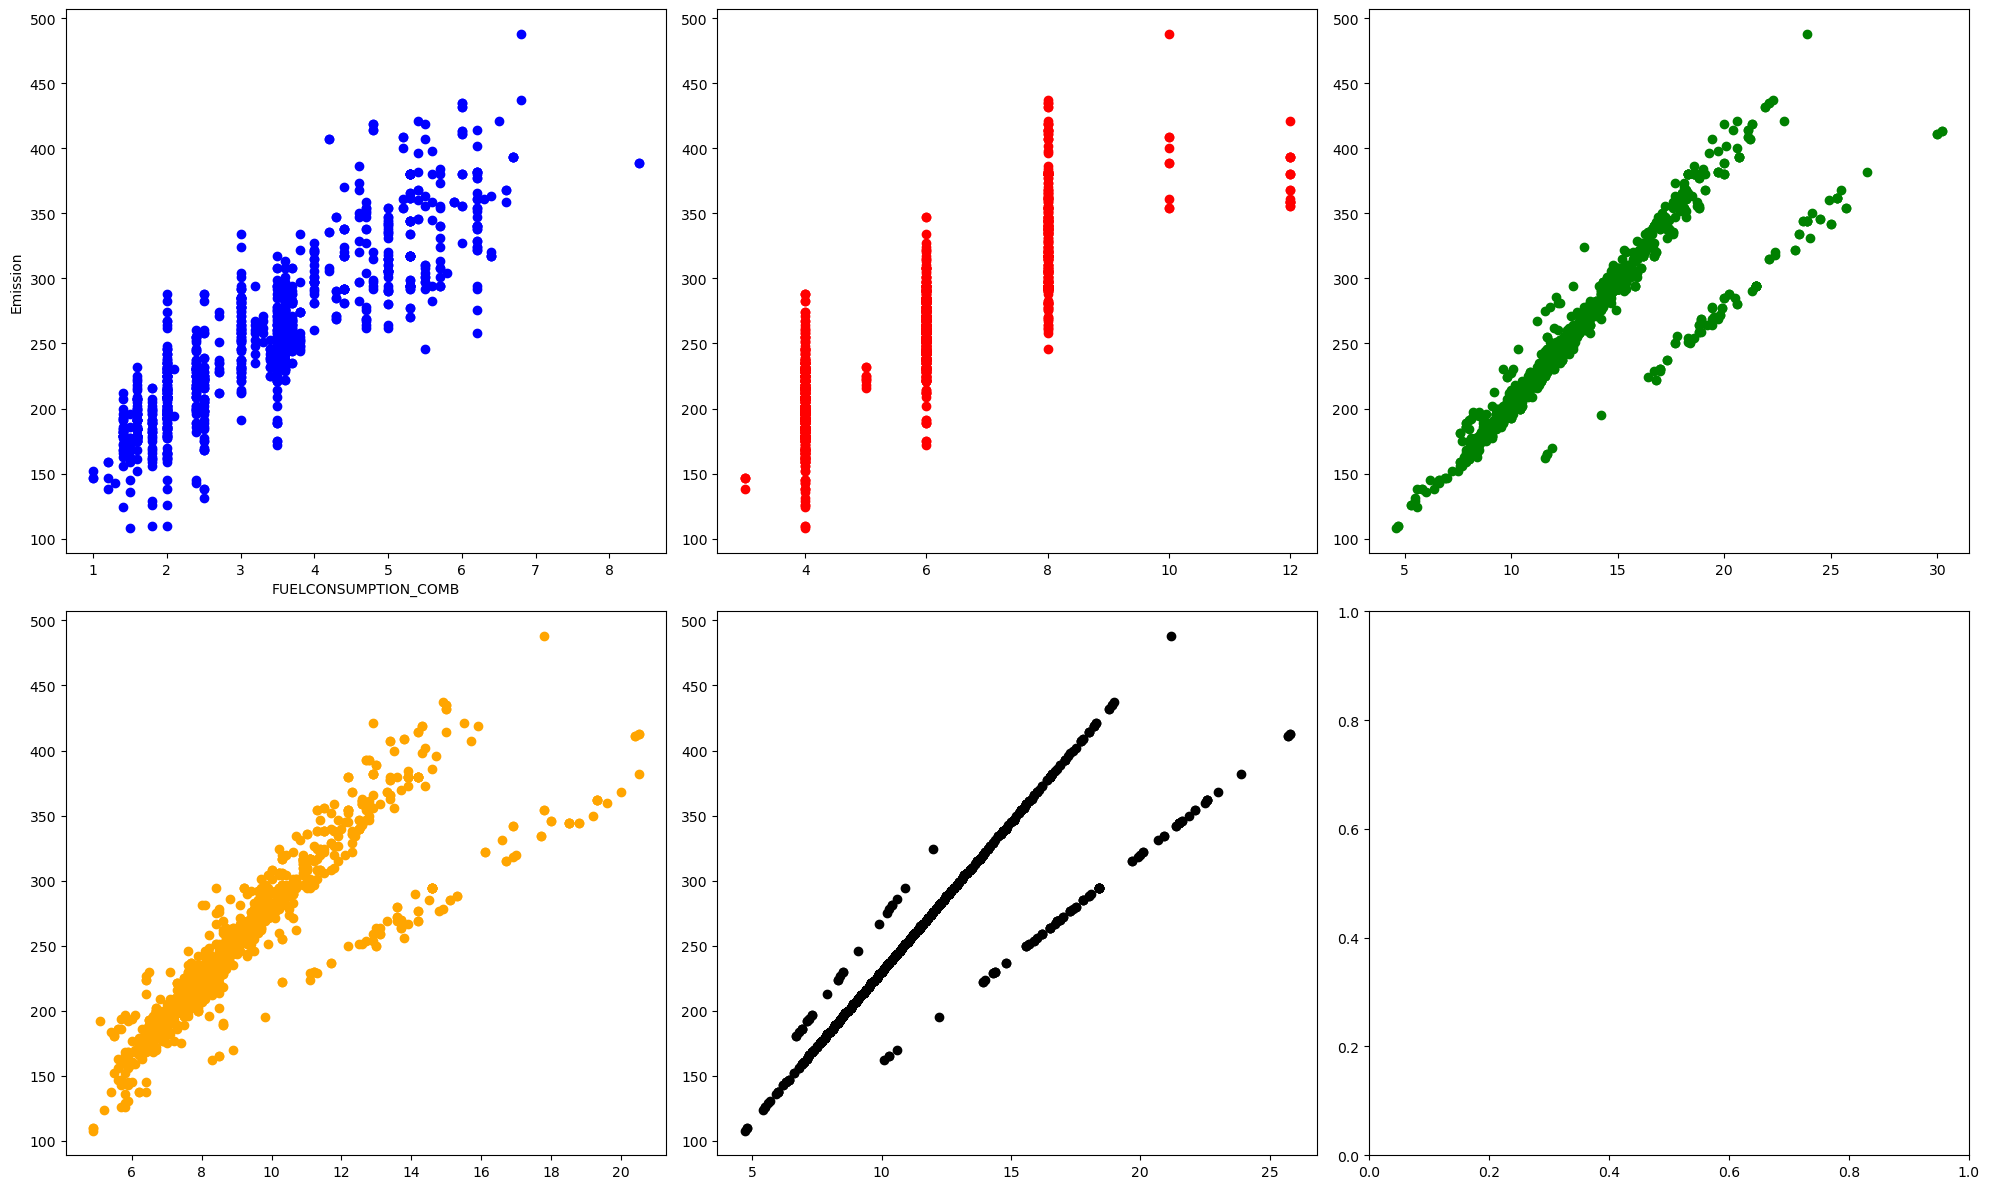

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

axes[0 , 0].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')  
axes[0 , 0].set_xlabel("Engine size")
axes[0 , 0].set_ylabel("Emission")

axes[0 , 1].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')  
axes[0 , 0].set_xlabel("CYLINDERS")
axes[0 , 0].set_ylabel("Emission")

axes[0 , 2].scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='green')
axes[0 , 0].set_xlabel("FUELCONSUMPTION_CITY")
axes[0 , 0].set_ylabel("Emission")

axes[1 , 0].scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='orange')
axes[0 , 0].set_xlabel("FUELCONSUMPTION_HWY")
axes[0 , 0].set_ylabel("Emission")

axes[1 , 1].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='black')
axes[0 , 0].set_xlabel("FUELCONSUMPTION_COMB")
axes[0 , 0].set_ylabel("Emission")

plt.tight_layout()
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [29]:
# Create train/test split (80% training, 20% testing)
# This ensures we can evaluate our model on unseen data
mask = np.random.rand(len(df)) < 0.8 # Mask for splitting the data - pick some random numbers equal to the length of df dataframe which are less than 0.8.
train = cdf[mask]
test = cdf[~mask]

print(f"Training set size: {len(train)} samples")
print(f"Testing set size: {len(test)} samples")
print(f"Training percentage: {len(train)/len(cdf)*100:.1f}%")

Training set size: 869 samples
Testing set size: 198 samples
Training percentage: 81.4%


### Training dataset

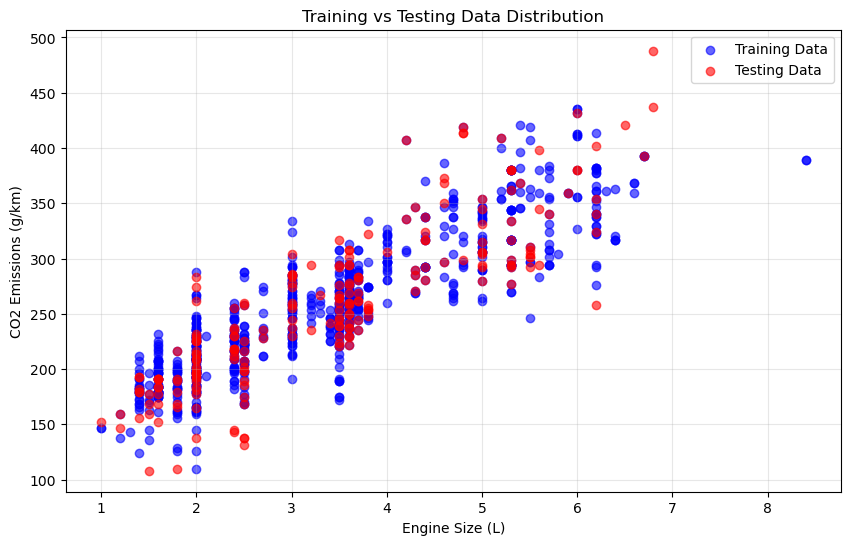

In [14]:
# Visualize the train/test split
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', alpha=0.6, label='Training Data')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red', alpha=0.6, label='Testing Data')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Training vs Testing Data Distribution")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Multiple Linear Regression

Instead of predicting Co2emission using a simple independent variable, we will use more to do so in this approach. They can be: FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.

In [34]:
# Import and create the linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Prepare training data
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Train the model
regr.fit(train_x, train_y)

# Display model parameters
print("Multiple Linear Regression Model Results:")
print("=" * 50)
print(f'Engine Size Coefficient:      {regr.coef_[0][0]:.2f}')
print(f'Cylinders Coefficient:        {regr.coef_[0][1]:.2f}')
print(f'Fuel Consumption Coefficient: {regr.coef_[0][2]:.2f}')
print(f'Intercept:                    {regr.intercept_[0]:.2f}')
print("=" * 50)
print("Multiple Linear Regression Equation:")
print(f"CO2_Emissions = {regr.coef_[0][0]:.2f} * Engine_Size + {regr.coef_[0][1]:.2f} * Cylinders + {regr.coef_[0][2]:.2f} * Fuel_Consumption + {regr.intercept_[0]:.2f}")
print("=" * 50)

Multiple Linear Regression Model Results:
Engine Size Coefficient:      9.73
Cylinders Coefficient:        7.96
Fuel Consumption Coefficient: 10.07
Intercept:                    61.73
Multiple Linear Regression Equation:
CO2_Emissions = 9.73 * Engine_Size + 7.96 * Cylinders + 10.07 * Fuel_Consumption + 61.73


## Multiple Linear Regression Formula

The linear regression model follows the equation:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 $$

Where:
- $\hat{y}$ = CO2 Emissions (dependent variable)
- $x_1$ = Engine Size (independent variable)
- $x_2$ = CYLINDERS (independent variable) 
- $x_3$ = FUELCONSUMPTION_COMB (independent variable)  
- $\theta_1$ = Slope coefficient (how much CO2 changes per unit of engine size)
- $\theta_2$ = Slope coefficient (how much CO2 changes per unit of CYLINDERS)
- $\theta_3$ = Slope coefficient (how much CO2 changes per unit of FUELCONSUMPTION_COMB)
- $\theta_0$ = Y-intercept (baseline CO2 emissions when engine size = 0)

sklearn estimates the coefficients and intercept from our data, using plain Ordinary Least Squares method.

#### Ordinary Least Squares (OLS)

OLS finds the best-fit line by minimizing the sum of squared errors between actual and predicted values. It estimates model parameters ($\theta_0, \theta_1, \theta_2, \theta_3$) that minimize:

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Key methods:**
- **Analytical solution**: Direct calculation using matrix operations
- **Iterative optimization**: Gradient descent algorithms for large datasets

# Prediction

In [36]:
# Multiple Linear Regression Model Evaluation on Test Data
from sklearn.metrics import r2_score, mean_squared_error

# Prepare test data with all three features for multiple regression
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x)

# Calculate evaluation metrics
mae = np.mean(np.absolute(predictions - test_y))
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Display results
print("Multiple Linear Regression Model Performance")
print("=" * 55)
print(f"Mean Absolute Error (MAE):     {mae:.2f} g/km")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} g/km")
print(f"R² Score:                      {r2:.3f}")
print("=" * 55)

# Feature importance analysis
feature_names = ['Engine Size', 'Cylinders', 'Fuel Consumption']
coefficients = regr.coef_[0]
print(f"\nFeature Importance (Coefficients):")
for name, coef in zip(feature_names, coefficients):
    print(f"• {name:<20}: {coef:.2f}")

# Interpretation
print(f"\nModel Interpretation:")
print(f"• The model explains {r2*100:.1f}% of the variance in CO2 emissions")
print(f"• On average, predictions are off by {mae:.1f} g/km")
print(f"• Using {len(feature_names)} features improves prediction accuracy")
print(f"• Higher R² (closer to 1.0) indicates better model performance")

Multiple Linear Regression Model Performance
Mean Absolute Error (MAE):     15.59 g/km
Mean Squared Error (MSE):      497.13
Root Mean Squared Error (RMSE): 22.30 g/km
R² Score:                      0.858

Feature Importance (Coefficients):
• Engine Size         : 9.73
• Cylinders           : 7.96
• Fuel Consumption    : 10.07

Model Interpretation:
• The model explains 85.8% of the variance in CO2 emissions
• On average, predictions are off by 15.6 g/km
• Using 3 features improves prediction accuracy
• Higher R² (closer to 1.0) indicates better model performance


<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset, but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?


In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Prepare training data
train_x_new = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y_new = np.asanyarray(train[['CO2EMISSIONS']])

# Train the model
regr.fit(train_x_new, train_y_new)

# Display model parameters
print("Multiple Linear Regression Model Results:")
print("=" * 50)
print(f'Engine Size Coefficient:      {regr.coef_[0][0]:.2f}')
print(f'Cylinders Coefficient:        {regr.coef_[0][1]:.2f}')
print(f'Fuel Consumption city Coefficient: {regr.coef_[0][2]:.2f}')
print(f'Fuel Consumption highway Coefficient: {regr.coef_[0][3]:.2f}')
print(f'Intercept:                    {regr.intercept_[0]:.2f}')
print("=" * 50)
print("Multiple Linear Regression Equation:")
print(f"CO2_Emissions = {regr.coef_[0][0]:.2f} * Engine_Size + {regr.coef_[0][1]:.2f} * Cylinders + {regr.coef_[0][2]:.2f} * Fuel_Consumption_city + {regr.intercept_[0]:.2f} + {regr.coef_[0][3]:.2f} * Fuel_Consumption_HWY")
print("=" * 50)

Multiple Linear Regression Model Results:
Engine Size Coefficient:      9.81
Cylinders Coefficient:        7.51
Fuel Consumption city Coefficient: 6.72
Fuel Consumption highway Coefficient: 2.98
Intercept:                    63.14
Multiple Linear Regression Equation:
CO2_Emissions = 9.81 * Engine_Size + 7.51 * Cylinders + 6.72 * Fuel_Consumption_city + 63.14 + 2.98 * Fuel_Consumption_HWY


In [40]:
from sklearn.metrics import r2_score, mean_squared_error

test_x_new = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y_new = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x_new)

# Calculate evaluation metrics
mae = np.mean(np.absolute(predictions - test_y_new))
mse = mean_squared_error(test_y_new, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y_new, predictions)

# Display results
print("Multiple Linear Regression Model Performance")
print("=" * 55)
print(f"Mean Absolute Error (MAE):     {mae:.2f} g/km")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} g/km")
print(f"R² Score:                      {r2:.3f}")
print("=" * 55)

# Feature importance analysis
feature_names = ['Engine Size', 'Cylinders', 'Fuel Consumption city', 'Fuel Consumption highway']
coefficients = regr.coef_[0]
print(f"\nFeature Importance (Coefficients):")
for name, coef in zip(feature_names, coefficients):
    print(f"• {name:<20}: {coef:.2f}")

# Interpretation
print(f"\nModel Interpretation:")
print(f"• The model explains {r2*100:.1f}% of the variance in CO2 emissions")
print(f"• On average, predictions are off by {mae:.1f} g/km")
print(f"• Using {len(feature_names)} features improves prediction accuracy")
print(f"• Higher R² (closer to 1.0) indicates better model performance")

Multiple Linear Regression Model Performance
Mean Absolute Error (MAE):     15.68 g/km
Mean Squared Error (MSE):      498.95
Root Mean Squared Error (RMSE): 22.34 g/km
R² Score:                      0.857

Feature Importance (Coefficients):
• Engine Size         : 9.81
• Cylinders           : 7.51
• Fuel Consumption city: 6.72
• Fuel Consumption highway: 2.98

Model Interpretation:
• The model explains 85.7% of the variance in CO2 emissions
• On average, predictions are off by 15.7 g/km
• Using 4 features improves prediction accuracy
• Higher R² (closer to 1.0) indicates better model performance


## Conclusions

This analysis demonstrated the application of multiple linear regression to predict vehicle CO2 emissions using multiple features:

### Key Findings:
1. **Multiple Feature Impact**: Engine size, cylinders, and fuel consumption all contribute significantly to CO2 emissions prediction
2. **Improved Accuracy**: Multiple linear regression with 3-4 features provides better accuracy than single-feature models
3. **Feature Importance**: Different fuel consumption metrics (city vs highway vs combined) have varying predictive power
4. **Model Comparison**: Using separate city and highway fuel consumption features may provide better results than combined consumption
5. **Practical Application**: The model can predict emissions with high accuracy using easily measurable vehicle specifications

### Key Performance Metrics:
- **R² Score**: Indicates how well the model explains variance in CO2 emissions
- **MAE**: Shows average prediction error in g/km
- **Feature Coefficients**: Reveal the relative importance of each predictor

### Future Improvements:
- **Polynomial Features**: Explore non-linear relationships between features
- **Feature Engineering**: Create interaction terms (e.g., engine_size × cylinders)
- **Regularization**: Apply Ridge or Lasso regression to prevent overfitting
- **Cross-validation**: Use k-fold validation for more robust model evaluation
- **Additional Features**: Include vehicle weight, transmission type, or model year
- **Ensemble Methods**: Combine multiple models for better predictions

---

## Acknowledgments

**Author**: Saeed Aghabozorgi  
**Learning Source**: This notebook is learned from and based on the work of Saeed Aghabozorgi  
**Dataset**: Government of Canada Open Data Portal  
**Learning Resources**: scikit-learn documentation and machine learning fundamentals  
**Tools**: Python, scikit-learn, pandas, matplotlib, numpy

*This notebook was created for educational purposes to demonstrate multiple linear regression concepts and techniques.*